In [1]:
from pyspark.sql import SparkSession, SQLContext
from pyspark.conf import SparkConf
conf = SparkConf()
spark = SparkSession.builder.config(conf=conf).getOrCreate()
from pyspark.sql.functions import col, asc

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1636820827359_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
sc.install_pypi_package("pandas==0.25.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/7e/ab/ea76361f9d3e732e114adcd801d2820d5319c23d0ac5482fa3b412db217e/pandas-0.25.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

In [3]:
sc.install_pypi_package("matplotlib==3.1.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/19/7a/60bd79c5d79559150f8bba866dd7d434f0a170312e4d15e8aefa5faba294/matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/34/895006117f6fce0b4de045c87e154ee4a20c68ec0a4c9a36d900888fb6bc/pyparsing-3.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl

Zadanie 1: Znajdź miasta w Polsce, w których średnie stężenie pyłu “pm10” było niższe niż maksymalne stężenie w Berlinie (w całym badanym okresie). Obliczenia wykonaj dla danych z kilku dni. Wyniki posortuj malejąco po stężeniu pm10.

In [5]:
smog_df_days = spark.read.json("s3a://openaq-fetches/realtime/2021-10-0[2-5]/*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
import pyspark.sql.functions as F

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
max_berlin_pm10 = smog_df_days.select(col("value")) \
    .filter((col("city")=="Berlin") & (col("parameter")=="pm10")) \
    .sort(col("value").desc()).first()

avg_smog_df = smog_df_days.select(col("city"), col("value")) \
    .filter((col("country")=="PL") & (col("parameter")=="pm10")) \
    .groupBy(col("city")) \
    .agg(F.mean(col("value")))

avg_smog_below_berlin = avg_smog_df.select(col("city"), col("avg(value)")) \
    .filter(col("avg(value)") < max_berlin_pm10.value) \
    .sort(col("avg(value)").desc())



avg_smog_below_berlin.show()



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+------------------+
|            city|        avg(value)|
+----------------+------------------+
|       Zabierzów|32.408556516853935|
|        Oświęcim| 32.33428571428571|
|      Inowrocław|32.299358974358974|
|           Gajew|32.218867924528304|
|          Nowiny|32.040214285714285|
|          Poznań| 31.72824343807764|
|          Rybnik| 31.62121546428571|
|          Olesno|31.151136882129276|
|        Chojnice|30.937955535714284|
|          Żywiec|30.835589130434784|
|            Łask|           30.8125|
|Wodzisław Śląski|30.693744565217393|
| Sucha Beskidzka|30.440883333333332|
|  Janów Lubelski|30.403225806451612|
|           Płock| 30.39225806451613|
|          Lublin|30.333571428571428|
|  Biała Podlaska| 30.27953068592058|
|        Żyrardów| 30.04675090252708|
|Dąbrowa Górnicza|29.896395652173915|
|          Sierpc| 29.78867383512545|
+----------------+------------------+
only showing top 20 rows

Zadanie 2: Dla danych z wybranych kilku dni przedstaw w ujęciu godzinowym (wybierz czas UTC) najwyższe zanotowane stężenie pm25 w poszczególnych miastach z całego zbioru danych. Wyniki posortuj po rosnąco datach.

In [24]:
smog_df_ex_2 = smog_df_days.select(col("parameter"), col("city"), col("value"), col("date.utc")) \
    .filter(col("parameter")=="pm25")

smog_df_ex_2_hour = smog_df_ex_2.withColumn("hour", F.substring("utc", 12, 12))

smog_df_ex_2 = smog_df_ex_2_hour.groupBy(col("city"), col("hour")) \
    .agg(F.max(col("value"))) \
    .sort(col("hour"))


smog_df_ex_2.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+----------+
|                city|        hour|max(value)|
+--------------------+------------+----------+
|          Winchester|00:00:00.000|      14.7|
|              Zgierz|00:00:00.000|      27.0|
|        NEWFOUNDLAND|00:00:00.000|       6.0|
|              ISLAND|00:00:00.000|       5.5|
|        Mount Vernon|00:00:00.000|      29.5|
|             Crawley|00:00:00.000|       5.5|
|        Jacksonville|00:00:00.000|      14.5|
|              Savona|00:00:00.000|       8.9|
|Weirton-Steubenville|00:00:00.000|      15.5|
|               Porto|00:00:00.000|       4.0|
|            Grenland|00:00:00.000| 11.793697|
|           Pirkanmaa|00:00:00.000|14.1081148|
|             Indiana|00:00:00.000|      12.1|
|          Brumunddal|00:00:00.000|       2.0|
|Shreveport-Bossie...|00:00:00.000|      14.6|
|Kingsport-Bristol...|00:00:00.000|      18.0|
|               TULSA|00:00:00.000|      17.1|
| Pendleton-Hermiston|00:00:00.000|       5.9|
|Santa Barbar

In [23]:
smog_df_ex_2.filter(col("city")=="Kraków").show(25)



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+------------+----------+
|  city|        hour|max(value)|
+------+------------+----------+
|Kraków|00:00:00.000|   45.8323|
|Kraków|01:00:00.000|   43.4368|
|Kraków|02:00:00.000|   41.7837|
|Kraków|03:00:00.000|   40.0617|
|Kraków|04:00:00.000|   43.6788|
|Kraków|05:00:00.000|   40.7798|
|Kraków|06:00:00.000|   32.6867|
|Kraków|07:00:00.000|   36.3985|
|Kraków|08:00:00.000|   44.4345|
|Kraków|09:00:00.000|   25.4021|
|Kraków|10:00:00.000|   25.1778|
|Kraków|11:00:00.000|   17.6295|
|Kraków|12:00:00.000|   15.7162|
|Kraków|13:00:00.000|   16.1556|
|Kraków|14:00:00.000|   14.4579|
|Kraków|15:00:00.000|   15.7321|
|Kraków|16:00:00.000|   20.0302|
|Kraków|17:00:00.000|   38.3578|
|Kraków|18:00:00.000|   43.9247|
|Kraków|19:00:00.000|   35.0507|
|Kraków|20:00:00.000|   34.2877|
|Kraków|21:00:00.000|    41.949|
|Kraków|22:00:00.000|   57.7092|
|Kraków|23:00:00.000|   47.0186|
+------+------------+----------+

Zadanie 3: Znajdź ranking miast pod względem średniego zanieczyszczenia liczonego dla N najwyższych pomiarów pod względem “pm25” dla danych z kilku dni. Rozważ jedynie miasta, których nazwy składają się z małych i dużych liter alfabetu łacińskiego.

In [7]:
from pyspark.sql.window import Window

N = 5

smog_df_ex_3_filtered = smog_df_days.select(col("city"), col("parameter"), col("value")) \
    .filter((col("city").rlike("^[a-zA-Z]+$")) & (col("parameter")=="pm25")) \
    .sort(col("city"), col("value").desc())

smog_df_ex_3_rows = smog_df_ex_3_filtered.withColumn("row_numbers", F.row_number().over(Window.partitionBy("city").orderBy(col("value").desc())))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
smog_df_ex_3_means = smog_df_ex_3_rows.filter(col("row_numbers") <= N) \
    .groupBy(col("city")) \
    .agg(F.mean(col("value"))) \
    .sort(col("avg(value)").desc())

smog_df_ex_3_means.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+-----------+
|        city| avg(value)|
+------------+-----------+
| Ulaanbaatar|      517.0|
|    Dushanbe|      485.0|
|      FRESNO|      332.1|
|SASKATCHEWAN|      269.8|
|      Lahore|      264.0|
|        Moss|259.8432498|
|    MANITOBA|     258.18|
|        MONO|      257.1|
|      TULARE|      241.0|
|    Khartoum|      166.0|
|      Fresno|      154.0|
|      Madera|      145.0|
|    MARIPOSA|      144.0|
| Bakersfield|      140.4|
|     Modesto|      139.2|
|       Quito|     136.71|
|   Vientiane|      135.0|
|     Jakarta|      127.0|
|         GBU|      124.6|
|     Kampala|      124.0|
+------------+-----------+
only showing top 20 rows

Zadanie 4:  Zwizualizuj na mapie średnie zanieczyszczenie w danym kraju dla wybranych kilku dni względem czasu (mapa + slider czasu albo zbiór klatek i animacja) dla wybranych państw.

Zadanie 5: Korzystanie z klastra dla dużych danych

1. Proszę wykonać zadanie 1 dla danych z całego miesiąca. Zmierzyć czas wykonania

In [11]:
smog_df_month = spark.read.json("s3a://openaq-fetches/realtime/2021-10*")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
max_berlin_pm10 = smog_df_month.select(col("value")) \
    .filter((col("city")=="Berlin") & (col("parameter")=="pm10")) \
    .sort(col("value").desc()).first()

avg_smog_df = smog_df_month.select(col("city"), col("value")) \
    .filter((col("country")=="PL") & (col("parameter")=="pm10")) \
    .groupBy(col("city")) \
    .agg(F.mean(col("value")))

avg_smog_below_berlin = avg_smog_df.select(col("city"), col("avg(value)")) \
    .filter(col("avg(value)") < max_berlin_pm10.value) \
    .sort(col("avg(value)").desc())

avg_smog_below_berlin.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+------------------+
|              city|        avg(value)|
+------------------+------------------+
|    Janów Lubelski| 46.64428357463804|
|         Nowa Ruda| 44.84173687306501|
|   Sucha Beskidzka|42.948647900956665|
|         Grudziądz|   42.804923857868|
|         Zawiercie| 40.71934563636364|
|         Zabierzów| 39.94396703196347|
|         Nowy Targ|  39.3515460451128|
|         Pabianice| 38.81681681681682|
|            Mielec|38.426241126543204|
|            Kraków|38.335847282714056|
|Goczałkowice-Zdrój| 38.04559526925013|
|          Oświęcim|37.631557935702205|
|            Zabrze| 37.52493958966565|
|  Wodzisław Śląski| 36.58313570776256|
|          Jarosław|36.419968974747476|
|      Zdzieszowice|36.300388296645714|
|          Radomsko| 36.21646178514163|
|            Zgierz|36.205673758865245|
|            Rybnik| 35.93036898406375|
|            Mosina|35.912208818818826|
+------------------+------------------+
only showing top 20 rows

2. Zwiększyć klaster do 2, 3, 4, 5, 6, 7 instancji workerów i zmierzyć czasy wykonania

1 worker: 921.581s
2 workers: 433.969s
3 workers: 302.331s
4 workers: 234.366s
5 workers: 171.442s
6 workers: 151.922s
7 workers: 128.184s



3. Narysować wykresy czasu, przyspieszenia i efektywności (time, speedup, efficiency)

In [1]:
import pandas as pd
times = [921.581, 433.969, 302.331, 234.366, 171.422, 151.922, 128.184]
speedup = list(map(lambda x: times[0] / x, times))
efficiency = [speedup[i] / (i + 1) for i in range(len(times))]

time_df = pd.DataFrame((times), \
                  index=["1 worker", "2 workers", "3 workers", "4 workers", "5 workers", "6 workers", "7 workers"], \
                  columns=["Time"])

speedup_df = pd.DataFrame((speedup), \
                  index=["1 worker", "2 workers", "3 workers", "4 workers", "5 workers", "6 workers", "7 workers"], \
                  columns=["Speedup"])

efficiency_df = pd.DataFrame((efficiency), \
                  index=["1 worker", "2 workers", "3 workers", "4 workers", "5 workers", "6 workers", "7 workers"], \
                  columns=["Efficiency"])

<AxesSubplot:>

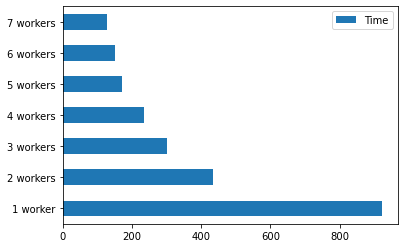

In [2]:
time_df.plot.barh()


<AxesSubplot:>

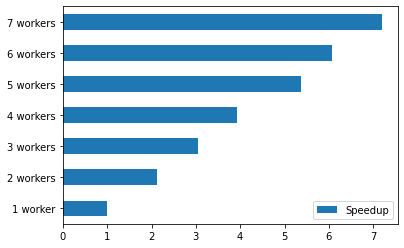

In [3]:
speedup_df.plot.barh()

<AxesSubplot:>

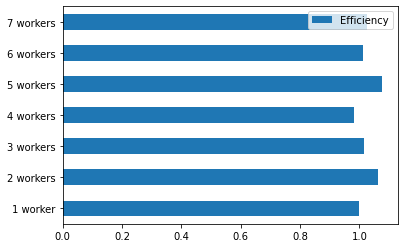

In [4]:
efficiency_df.plot.barh()

Zadanie 6: Proszę wykonać przykładowe zapytanie dla danych z całego roku 2020. Załączyć wybrane wykresy ze Spark UI (https://spark.apache.org/docs/latest/web-ui.html), np. DAG, diagram Gantta, informacje o rozmiarach danych.

In [29]:
smog_year_df = spark.read.json("s3a://openaq-fetches/realtime/2020*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
max_berlin_pm10 = smog_year_df.select(col("value")) \
    .filter((col("city")=="Berlin") & (col("parameter")=="pm10")) \
    .sort(col("value").desc()).first()

avg_smog_df = smog_year_df.select(col("city"), col("value")) \
    .filter((col("country")=="PL") & (col("parameter")=="pm10")) \
    .groupBy(col("city")) \
    .agg(F.mean(col("value")))

avg_smog_below_berlin = avg_smog_df.select(col("city"), col("avg(value)")) \
    .filter(col("avg(value)") < max_berlin_pm10.value) \
    .sort(col("avg(value)").desc())

avg_smog_below_berlin.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+------------------+
|              city|        avg(value)|
+------------------+------------------+
|            Mosina| 44.27369058157482|
|         Nowy Targ|39.427545825713466|
|Goczałkowice-Zdrój| 38.59392616848671|
|   Sucha Beskidzka| 37.42577090386296|
|         Nowa Ruda| 37.25238177325578|
|           Cieszyn| 37.15788696107782|
|            Żywiec|36.486112680489924|
|           Wschowa| 36.12025924728145|
|         Grudziądz| 35.42178944160893|
|          Oświęcim| 35.37582725768586|
|         Nowy Sącz|34.907119313299944|
|            Rybnik| 34.84019316726854|
|           Skawina|34.801683185136014|
|  Wodzisław Śląski| 34.72941789211982|
|              Łask| 34.10457831325302|
|         Zabierzów| 34.00514063118125|
|            Zabrze|33.489345814078476|
|          Radomsko|33.263191033874826|
|            Zgierz|  33.2560815253123|
|         Zawiercie| 32.98931671187174|
+------------------+------------------+
only showing top 20 rows

DAG:


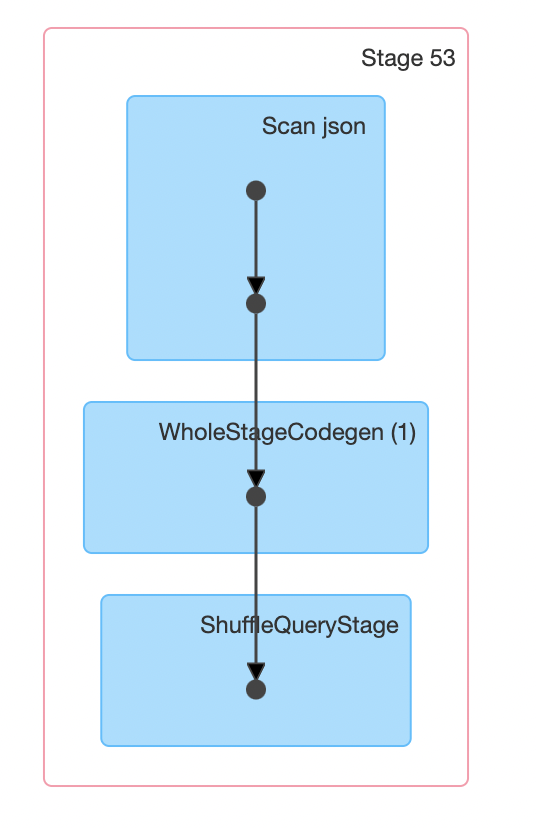